In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from prophet import Prophet

In [5]:
#importing the dataset

avocado_df = pd.read_csv('c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-4\\Project 4\\avocado.csv')
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


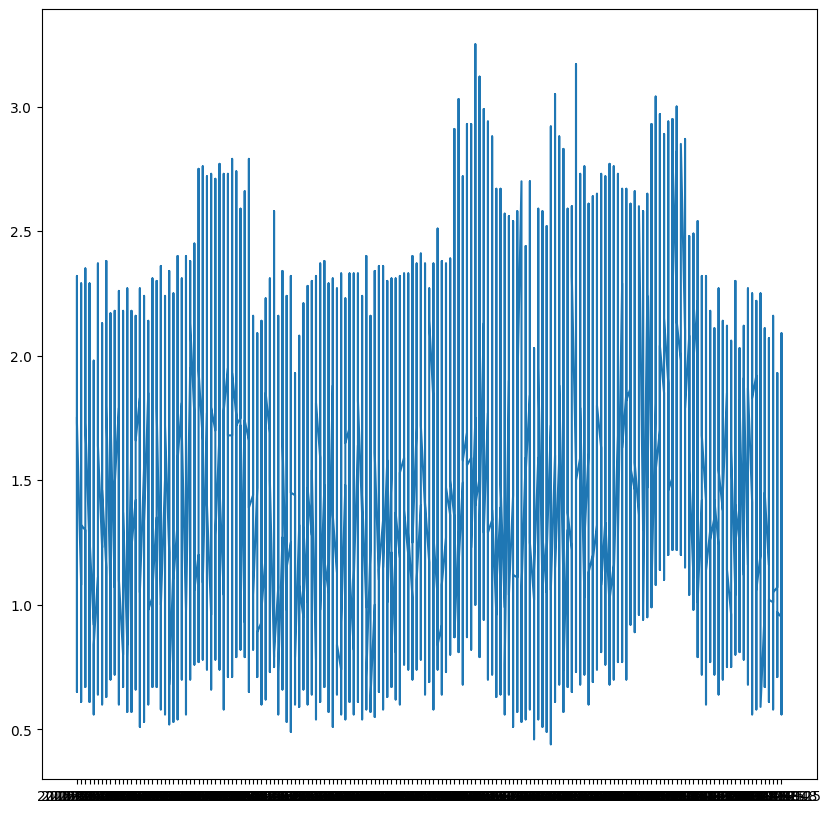

In [16]:
#Exploring the dataset
avocado_df = avocado_df.sort_values('Date')
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'TotalUS'),
  Text(2, 0, 'Tampa'),
  Text(3, 0, 'Denver'),
  Text(4, 0, 'Louisville'),
  Text(5, 0, 'HartfordSpringfield'),
  Text(6, 0, 'Charlotte'),
  Text(7, 0, 'Portland'),
  Text(8, 0, 'Nashville'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'Sacramento'),
  Text(11, 0, 'SanDiego'),
  Text(12, 0, 'Northeast'),
  Text(13, 0, 'LosAngeles'),
  Text(14, 0, 'PhoenixTucson'),
  Text(15, 0, 'Indianapolis'),
  Text(16, 0, 'Philadelphia'),
  Text(17, 0, 'Detroit'),
  Text(18, 0, 'Jacksonville'),
  Text(19, 0, 'RichmondNorfolk'),
  Text(20, 0, 'BuffaloRochester'),
  Text(21, 0, 'Houston'),
  Text(22, 0, 'SouthCarolina'),
  Text(23, 0, 'GreatLake

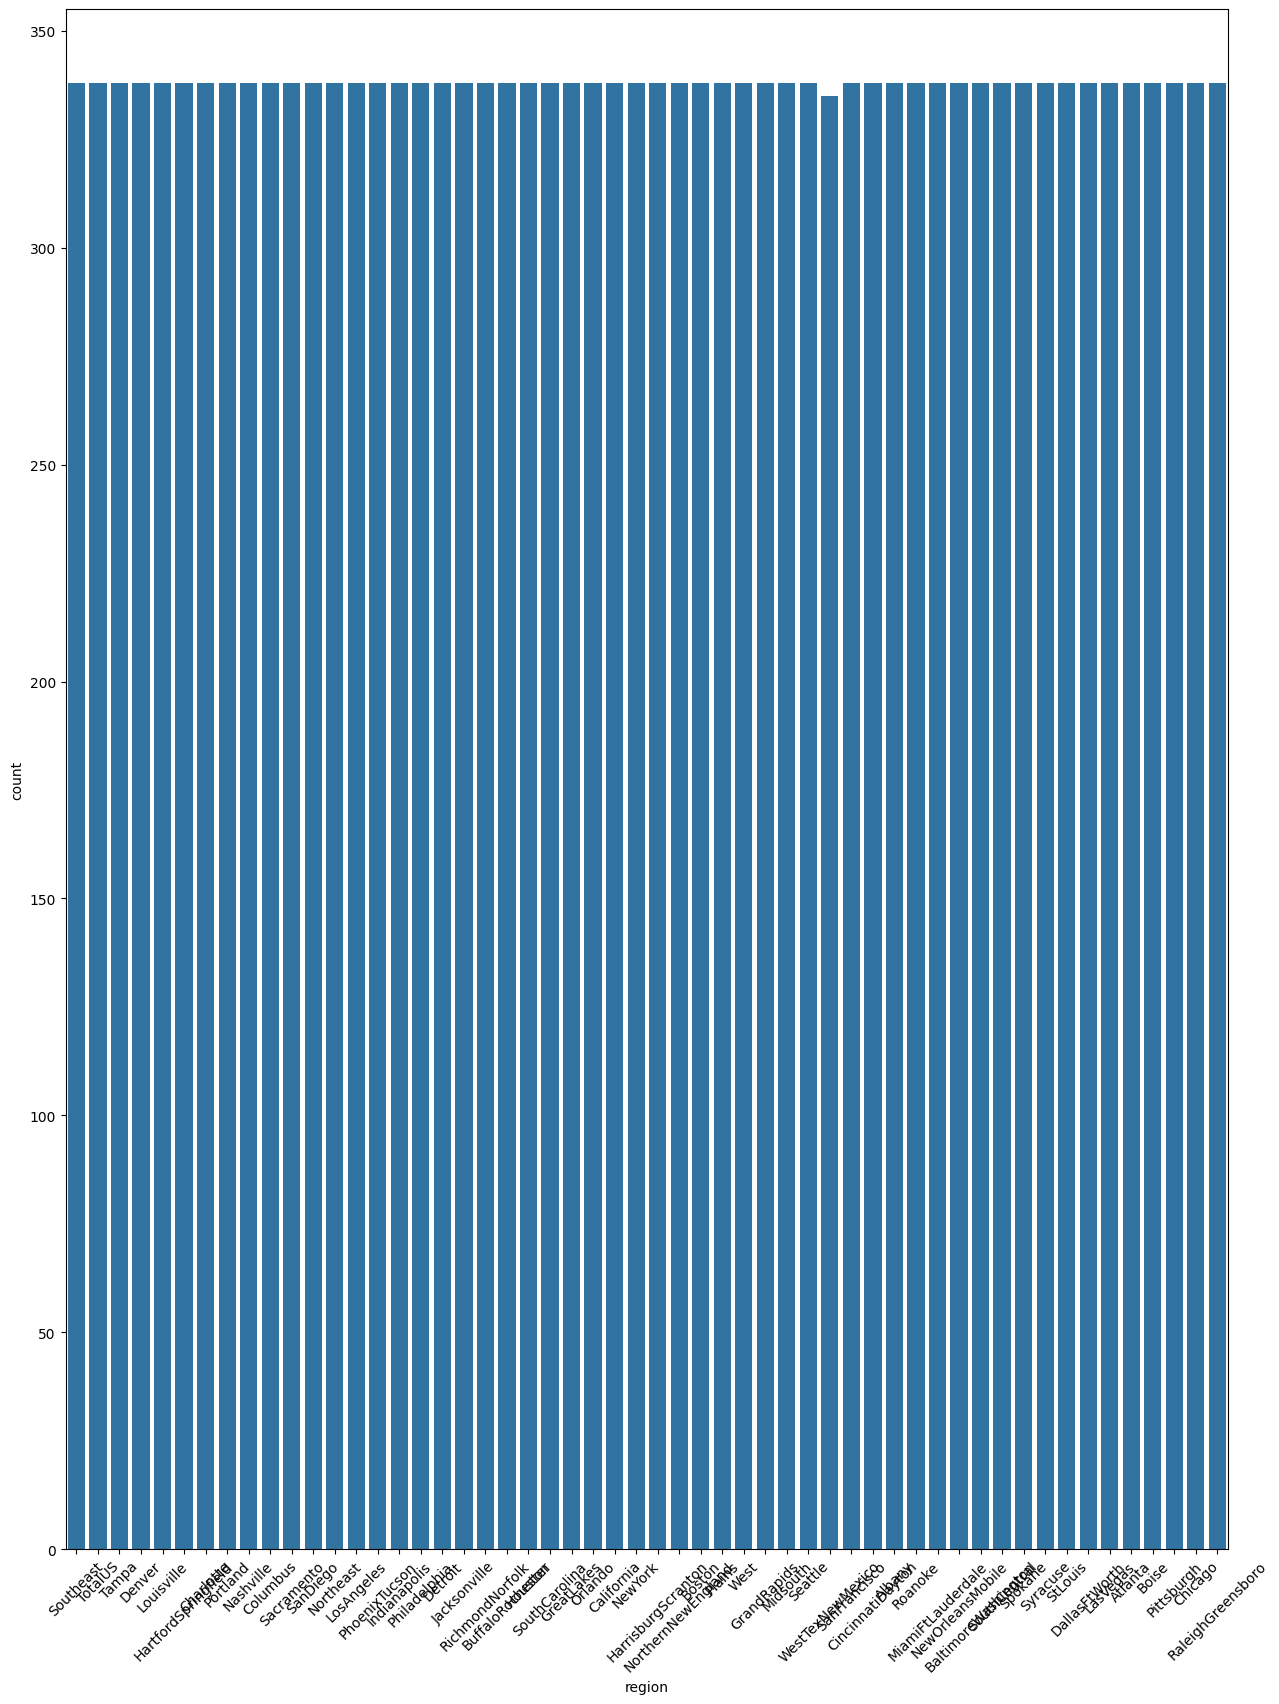

In [23]:
plt.figure(figsize=[15,20])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

<Axes: xlabel='year', ylabel='count'>

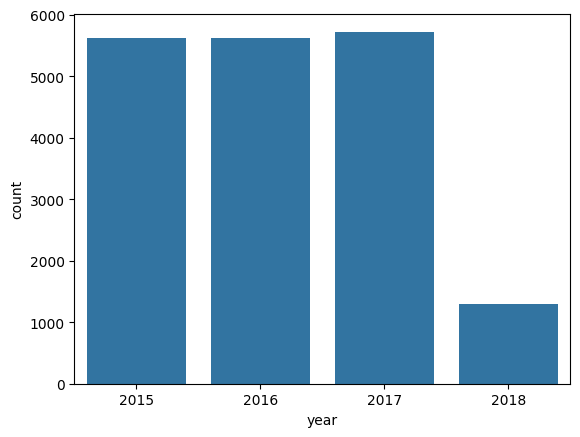

In [25]:
#comparing the yearly sales
sns.countplot(x = 'year', data = avocado_df)

In [28]:
avocado_Prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_Prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92
...,...,...
8670,2018-03-25,1.21
17997,2018-03-25,1.52
18129,2018-03-25,1.38
17973,2018-03-25,1.45


In [29]:
#renaming the columns
avocado_Prophet_df = avocado_Prophet_df.rename(columns={'Date': 'ds', 'AveragePrice':'y'})
avocado_Prophet_df


,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92
...,...,...
8670,2018-03-25,1.21
17997,2018-03-25,1.52
18129,2018-03-25,1.38
17973,2018-03-25,1.45


In [31]:
#Training the model

m = Prophet()
m.fit(avocado_Prophet_df)

15:36:27 - cmdstanpy - INFO - Chain [1] start processing
15:36:31 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
#forecasting the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500275,0.917881,1.856455,1.500275,1.500275,-0.114651,-0.114651,-0.114651,-0.114651,-0.114651,-0.114651,0.0,0.0,0.0,1.385624
1,2015-01-11,1.495033,0.927634,1.882107,1.495033,1.495033,-0.106385,-0.106385,-0.106385,-0.106385,-0.106385,-0.106385,0.0,0.0,0.0,1.388649
2,2015-01-18,1.489792,0.935534,1.845177,1.489792,1.489792,-0.106187,-0.106187,-0.106187,-0.106187,-0.106187,-0.106187,0.0,0.0,0.0,1.383605
3,2015-01-25,1.484551,0.851056,1.821116,1.484551,1.484551,-0.125240,-0.125240,-0.125240,-0.125240,-0.125240,-0.125240,0.0,0.0,0.0,1.359311
4,2015-02-01,1.479309,0.833369,1.824802,1.479309,1.479309,-0.153673,-0.153673,-0.153673,-0.153673,-0.153673,-0.153673,0.0,0.0,0.0,1.325637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.174332,0.533667,1.608587,0.992422,1.347761,-0.087817,-0.087817,-0.087817,-0.087817,-0.087817,-0.087817,0.0,0.0,0.0,1.086515
530,2019-03-22,1.173627,0.570335,1.622268,0.991086,1.347468,-0.086109,-0.086109,-0.086109,-0.086109,-0.086109,-0.086109,0.0,0.0,0.0,1.087518
531,2019-03-23,1.172922,0.535712,1.627360,0.989184,1.347465,-0.084124,-0.084124,-0.084124,-0.084124,-0.084124,-0.084124,0.0,0.0,0.0,1.088798
532,2019-03-24,1.172217,0.560188,1.626945,0.988146,1.347582,-0.081884,-0.081884,-0.081884,-0.081884,-0.081884,-0.081884,0.0,0.0,0.0,1.090333


C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


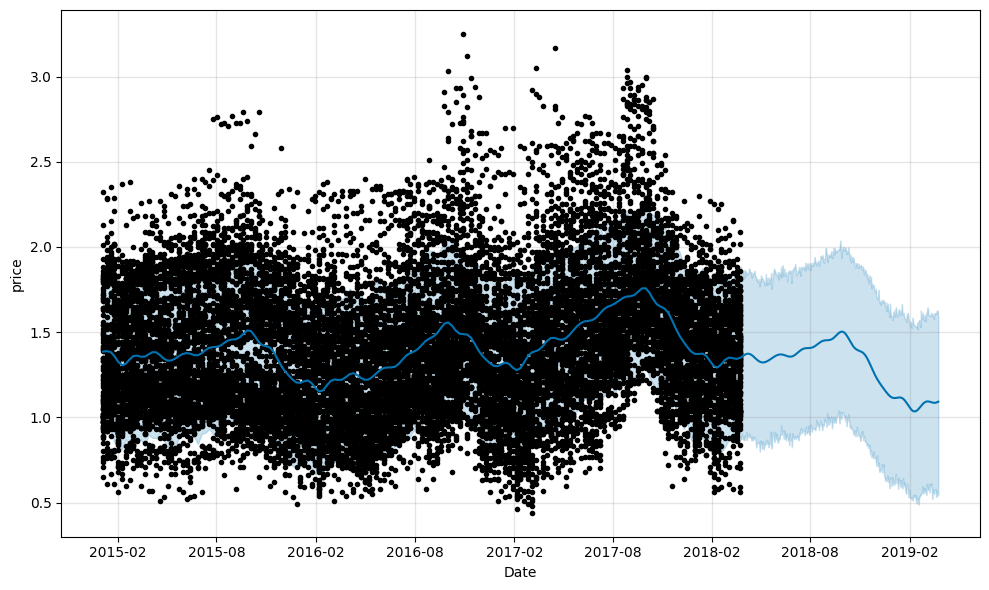

In [34]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'price')

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

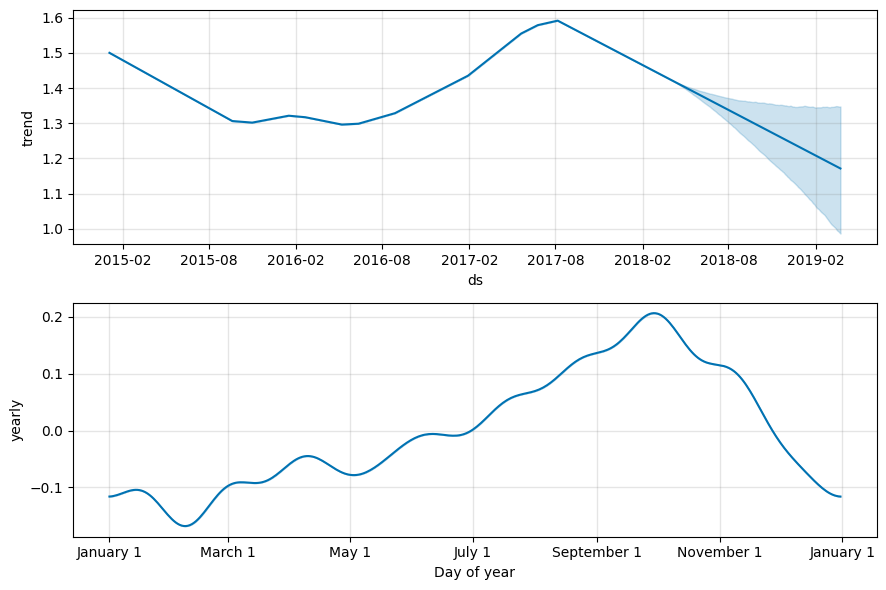

In [36]:
figure = m.plot_components(forecast)

In [40]:
avocado_df
avocado_df_sample = avocado_df[avocado_df['region']== 'West']
avocado_df_sample = avocado_df_sample.sort_values('Date')
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


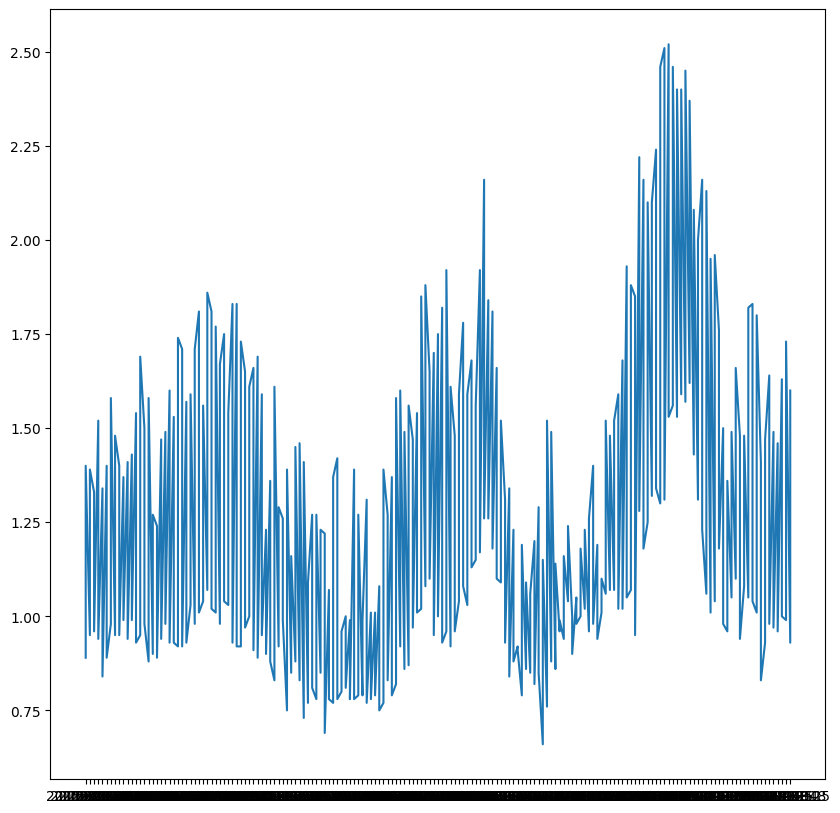

In [48]:
plt.figure(figsize = [10, 10])
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


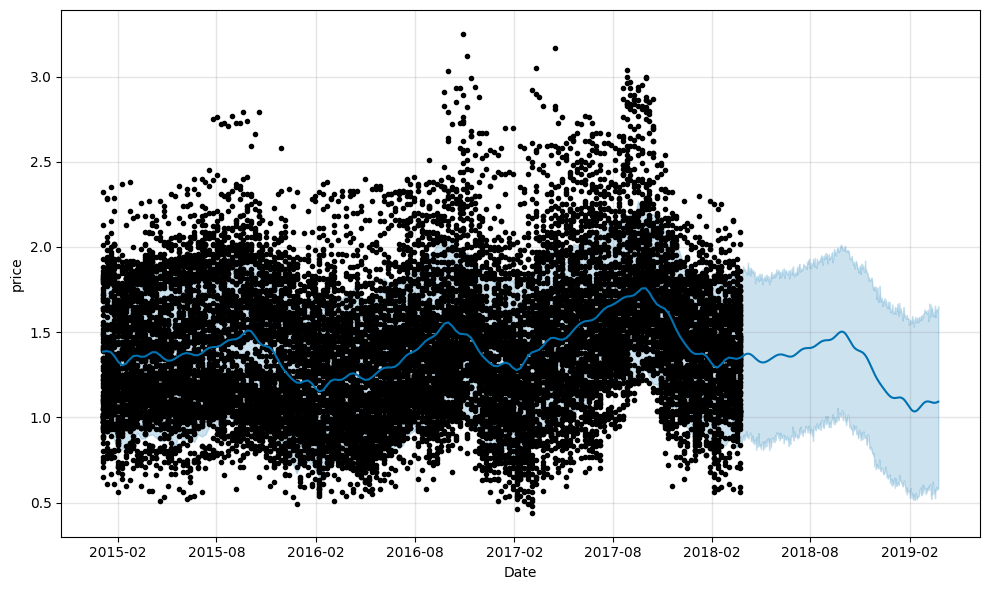

In [50]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'price')

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

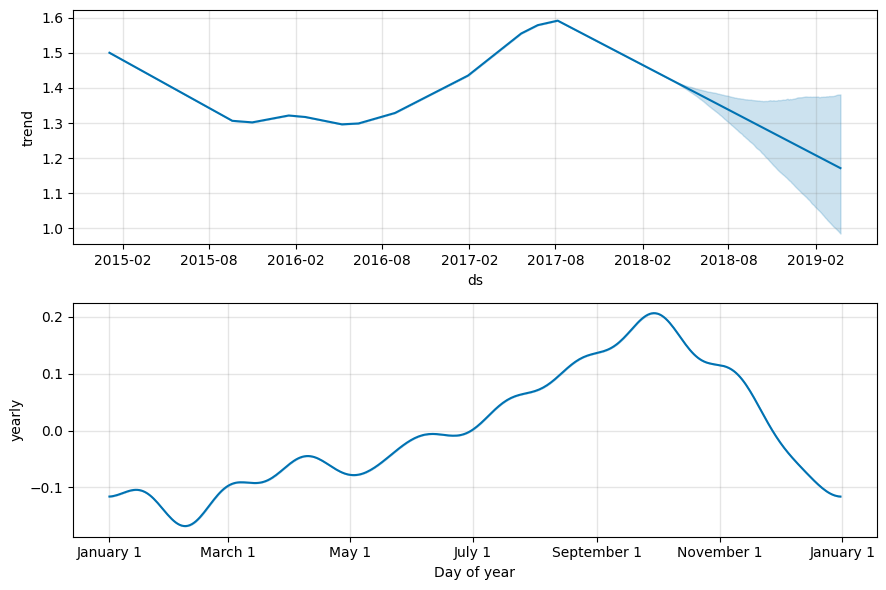

In [53]:
figure = m.plot_components(forecast)
